# **Empires & Puzzles**

При изучении игры можно выделить несколько негативных моментов в геймдеве:
1. *В игре несовсем корректно настроен баланс ресурсов.*

  Первоначально основных ресурсов игры - *еды* и *железа* катастрофически не хватает, затем их становится так много, что игрок не знает, куда их девать. Особенно когда все герои прокачены, а расходники сделаны.

  Если скорректировать баланс накопления ресурсов и времени прокачки героев, то отток пользователей снизится.

2. *Кривой откат событий.*
  
  Откат миссий начинается с момента получения награды. То есть начало нового события может прийтись и часто приходится на то время, когда человек спит или работает.

 Если раз в сутки давать задания, и игрок их будет выполнять в течение дня в удобное для себя время, это позволит увеличить долю активных игроков и уменьшить отток пользователей.
3. *Награды в PvP.*

  У игроков нет стимула добиваться высокого рейтинга в PvP. Награда дается за победу над слабыми игроками. Поэтому игрокам часто приходится специально проигрывать, выставлять в защиту слабых героев, чтобы понизить свой рейтинг, а затем сражаться со слабыми игроками.

  Если за победу над игроками с более высоким рейтингом давать хорошую награду, у игроков появится желание прокачивать своих героев, а это позволит увеличить доходность игры.

In [ ]:
import matplotlib.pyplot as plt
import pandas
import pandas as pd
import numpy as np
import seaborn as sns

Загрузим данные по платящему и неплатящему пользователю. Уберём дубликаты и пустые значения.

In [ ]:
df_whale = pandas.read_excel('/content/Empires___Puzzles_Whale.xlsx', sheet_name='Расшифровка')
df_whale = df_whale.drop_duplicates()
df_whale = df_whale.fillna(0)
df_whale.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,Date,Day,Session,Video #,Videolink,Videolength,Timestamp,Timelink,Player Level,Stronghold Level,...,Team Power,Name,Level,Rarity,Stage,Result,Gems,Gems+,Gems-,Gems Balance
0,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:00,00:00:00,1,1,...,0.0,0,0,0.0,0,0,0.0,0,0,0
1,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:12,00:00:12,1,1,...,0.0,0,0,0.0,0,0,0.0,0,0,0
2,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:15,00:00:15,1,1,...,0.0,0,0,0.0,0,0,0.0,0,0,0
3,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:25,00:00:25,1,1,...,0.0,0,0,0.0,0,0,0.0,0,0,0
4,2020-10-27,1,1,1.1,https://youtu.be/orua1CzWdZU?list=PLTjhk5BwsiV...,00:32:35,00:00:26,00:00:26,1,1,...,0.0,0,0,0.0,0,0,0.0,0,0,0


In [ ]:
df_non_paying = pandas.read_excel('/content/Empires___Puzzles_Non-Paying.xlsx', sheet_name='Расшифровка')
df_non_paying = df_non_paying.drop_duplicates()
df_non_paying = df_non_paying.fillna(0)
df_non_paying.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,Date,Day,Session,Video #,Videolink,Videolength,Timestamp,Timelink,Player Level,Stronghold Level,...,Level,Rarity,Stage2,Provimce,Stage,Result,Gems,Gems+,Gems-,Gems Balance
0,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:00,00:00:00,1.0,1,...,0,0.0,0,0.0,0.0,0,0.0,0,0,0
1,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:21,00:00:21,1.0,1,...,0,0.0,0,0.0,0.0,0,0.0,0,0,0
2,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:21,00:00:21,1.0,1,...,0,0.0,0,0.0,0.0,0,0.0,0,0,0
3,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:35,00:00:35,1.0,1,...,0,0.0,0,0.0,0.0,0,0.0,0,0,0
4,2020-10-14,1,1,1.1,https://youtu.be/fee6_4ikGMw?list=PLTjhk5BwsiV...,01:02:17,00:00:37,00:00:37,1.0,1,...,0,0.0,0,0.0,0.0,0,0.0,0,0,0


Посмотрим различие в количестве сессий пользователей за все 14 дней игры.

<Axes: xlabel='Day', ylabel='Session'>

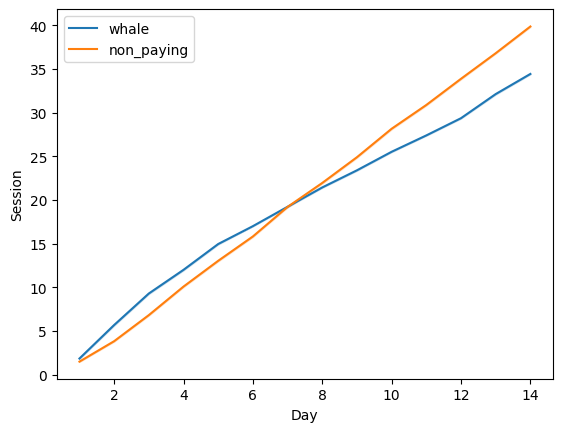

In [ ]:
sns.lineplot(x=df_whale['Day'], y=df_whale['Session'],label='whale')
sns.lineplot(x=df_non_paying['Day'], y=df_non_paying['Session'],label='non_paying')

Видим, что неплатящий игрок после 7 дня заходит в игру чаще.

Посмотрим основные действия игроков и выделим основные отличия.

In [ ]:
df_whale['Tag'].value_counts()

Base             2082
Raid             1283
Campaign         1239
Train             792
Hero              766
Summon            702
Building          539
Alliance          341
Gathering         249
Offers            234
Shop              206
Path of Valor     178
Global Map        164
Event             162
Tournament        156
Inventory         128
Missions          123
Alliance Wars     113
Craft             103
Tutorial          103
Quests             85
Watchtower         76
Player             67
Troops             64
Purchase           59
Buy res f          39
Idle               31
Mystic Vision      25
Buy res i          19
VIP                19
Mail               19
Buy                16
Buy bi             11
Buy res             9
Buy bundle          7
0                   2
Name: Tag, dtype: int64

In [ ]:
df_non_paying['Tag'].value_counts()

Base             1863
Campaign         1206
Raid             1155
Hero              620
Train             365
Offers            316
Alliance          312
Building          292
Gathering         269
Summon            258
Watchtower        186
Craft             164
Inventory         154
Global Map        145
Shop              145
Player            135
Path of Valor     133
Missions          130
Event             114
Quests            105
Idle               81
VIP                70
Tutorial           59
Alliance Wars      54
Mystic Vision      36
Mail               34
Buy                 3
Raid                2
raid                1
Vip                 1
Name: Tag, dtype: int64

Видим, что в поведении платящего и неплатящего пользователей есть отличия.

Например, платящий пользователь чаще проходит тренировки, совершает призывы героев, занимается стройкой и улучшением зданий.

В свою очередь неплатящий пользователь чаще пользуется бесплатными предложениями, всплывающими во время игры.

По всем остальным метрикам, действия игроков схожи.

Рассмотрим различия на графиках.

In [ ]:
tag1 = df_whale[['Name', 'Tag']].groupby('Tag').count()
tag1 = tag1.loc[['Train', 'Summon', 'Building', 'Offers' ]]

tag2 = df_non_paying[['Name', 'Tag']].groupby('Tag').count()
tag2 = tag2.loc[['Train', 'Summon', 'Building', 'Offers' ]]

df= pd.DataFrame()
df['whale']=tag1['Name']
df['non_paying']=tag2['Name']
df


,whale,non_paying
Tag,,
Train,792,365
Summon,702,258
Building,539,292
Offers,234,316


<Axes: title={'center': 'Основные различия в действиях игроков'}, xlabel='Tag', ylabel='Количество активностей за 14 дней'>

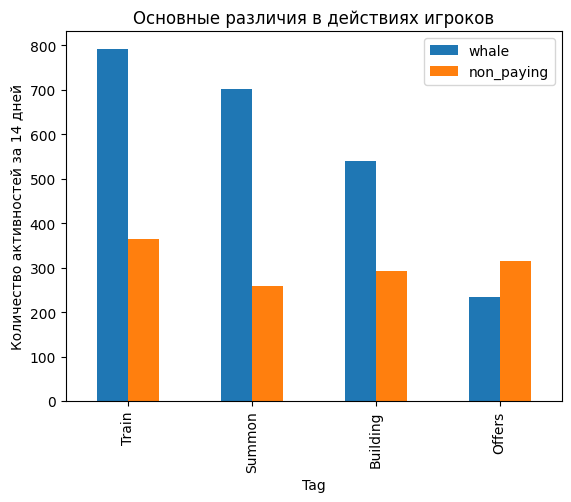

In [ ]:
df.plot(kind='bar',
        title='Основные различия в действиях игроков',
        xlabel='Tag',
        ylabel='Количество активностей за 14 дней')

Можно предположить, что на такую статистику влияет нехватка ресурсов у неплатящего игрока.

Здесь опять же можно отрегулировать баланс ресурсов. Если за просмотр рекламы, давать игроку дополнительные ресурсы, то у игрока будет больше активностей в игре, а монетизация самой игры вырастит.

А какое количество побед и поражений было у платящего и не платящего пользователей?

In [ ]:
res1=df_whale[['Name', 'Result']].groupby('Result').count()
res1 = res1.loc[['Defeat', 'Victory']]
res2=df_non_paying[['Name', 'Result']].groupby('Result').count()
res2 = res2.loc[['Defeat', 'Victory']]

df2= pd.DataFrame()
df2['whale']=res1['Name']
df2['non_paying']=res2['Name']
df2

,whale,non_paying
Result,,
Defeat,134,214
Victory,465,347


<Axes: title={'center': 'Результаты боев'}, xlabel='Tag', ylabel='Количество за 14 дней'>

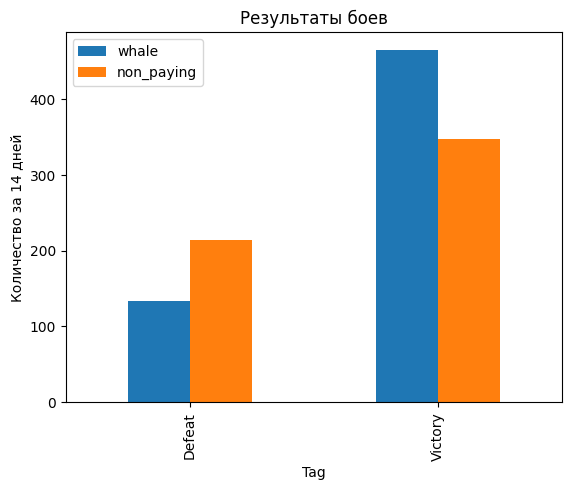

In [ ]:
df2.plot(kind='bar',
        title='Результаты боев',
        xlabel='Tag',
        ylabel='Количество за 14 дней')

Из диаграммы видим, что у неплатящего пользователя поражений почти в 2 раза больше, чем у платящего.

Т.к у неплатящего игрока достаточно много поражений, после поражения игроку можно предложить усилить команду, запустив банер с нужным героем, это увеличит шансы игрока на победу.

Сравним, как у игроков росли уровни в течение 14 дней.

<Axes: xlabel='Day', ylabel='Player Level'>

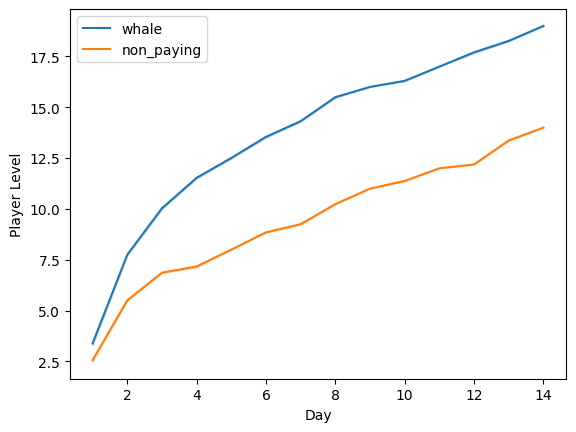

In [ ]:
sns.lineplot(x=df_whale['Day'], y=df_whale['Player Level'],label='whale')
sns.lineplot(x=df_non_paying['Day'], y=df_non_paying['Player Level'],label='non_paying')

Видим, что у платящего пользователя практически с первого дня быстрее повышается уровень, чем у неплатящего.

Изучим метрику процента побед игроков по дням.

In [ ]:
#уберем в колонке результата боя все нулевые значения
df_whale=df_whale[df_whale['Result'] != 0]

#посчитаем количество боев всего по дням у платящего пользователя
defeat_all=df_whale[['Result','Date']].groupby('Date').count()

#выберем только победы и посчитаем их колличество по дням
Result_victory=df_whale[df_whale.Result=='Victory']
Result_victory=Result_victory[['Result','Date']].groupby('Date').count()

#создадим датасет с данными
df3= pd.DataFrame()
df3['Result']=defeat_all['Result']
df3['Victory']=Result_victory['Result']
df3['%']=df3['Victory']/df3['Result']*100
df3

,Result,Victory,%
Date,,,
2020-10-27,64,49,76.562500
2020-10-28,72,55,76.388889
2020-10-29,62,38,61.290323
2020-10-30,45,31,68.888889
2020-10-31,49,34,69.387755
2020-11-01,38,24,63.157895
2020-11-02,62,49,79.032258
2020-11-03,34,25,73.529412
2020-11-04,28,15,53.571429


In [ ]:
#уберем в колонке результата боя все нулевые значения
df_non_paying=df_non_paying[df_non_paying['Result'] != 0]

#посчитаем количество боев всего по дням у неплатящего пользователя
defeat_all2=df_non_paying[['Result','Date']].groupby('Date').count()

#выберем только победы и посчитаем их колличество по дням
Result_victory2=df_non_paying[df_non_paying.Result=='Victory']
Result_victory2=Result_victory2[['Result','Date']].groupby('Date').count()

#создадим датасет с данными
df4= pd.DataFrame()
df4['Result']=defeat_all2['Result']
df4['Victory']=Result_victory2['Result']
df4['%']=df4['Victory']/df4['Result']*100
df4

,Result,Victory,%
Date,,,
2020-10-14,48,35,72.916667
2020-10-15,41,24,58.536585
2020-10-16,29,11,37.931034
2020-10-17,37,19,51.351351
2020-10-18,35,28,80.000000
2020-10-19,36,24,66.666667
2020-10-20,46,25,54.347826
2020-10-21,44,29,65.909091
2020-10-22,29,18,62.068966


<ipython-input-33-8f3a453cf2eb>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  snsplot = sns.kdeplot(df3['%'], shade=True)
<ipython-input-33-8f3a453cf2eb>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  snsplot = sns.kdeplot(df4['%'], shade=True)


<Axes: xlabel='%', ylabel='Density'>

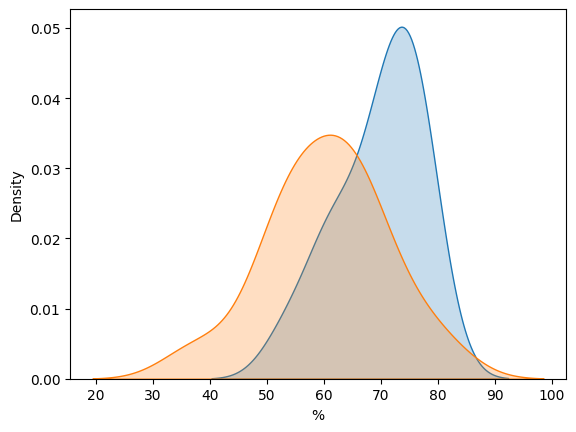

In [ ]:
snsplot = sns.kdeplot(df3['%'], shade=True)
snsplot = sns.kdeplot(df4['%'], shade=True)
snsplot

Распределение близко к нормальному

In [ ]:
import scipy.stats as st

Проверим отличия метрики процента побед игроков статистически, используя T-test Стьюдента.

За H0 примем, что обе группы имеют равные средние, т.е. статистическизначимых различий между пользователями нет.
H1-группы имеют разные средние значения, т.е. имеются статистическизначимые различия между пользователями.

In [ ]:
stat, p = st.ttest_ind(df3['%'], df4['%'])

print('Статистика=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые. Статистическизначимых различий между пользователями нет')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются. Имеются статистическизначимые различия между пользователями.')

Статистика=2.67506, p=0.01275
Отклоняем нулевую гипотезу, средние, вероятно, различаются. Имеются статистическизначимые различия между пользователями.
